# Model Training

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# warnings.filter("ignore")

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

### Reading the csv file into pands Dataframe

In [2]:
df = pd.read_csv("data/std_perf.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [4]:
X = df.drop(columns=["math score"])
y = df["math score"]

In [5]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

### Creating Column Transformer for data preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features),
    ]
)

In [8]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [9]:
X = preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

### Train Test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape, X_test.shape)

(800, 19) (200, 19)


In [12]:
print(y_train.shape, y_test.shape)

(800,) (200,)


#### Define a perfomance evaluating function

In [13]:
def get_perfomance(y_actual, y_pred):
    r_score = r2_score(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = root_mean_squared_error(y_actual, y_pred)
    return r_score, mae, mse, rmse

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)  
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_r2_score , model_train_mae, model_train_mse, model_train_rmse = get_perfomance(y_train, y_train_pred)
    model_test_r2_score , model_test_mae, model_test_mse, model_test_rmse = get_perfomance(y_test, y_test_pred)

    print(f"{list(models.keys())[i]}\n")
    model_list.append(list(models.keys())[i])


    print("========== Train Set Performance ==========")
    print(f"R2 Score       : {model_train_r2_score}")
    print(f"MAE            : {model_train_mae}")
    print(f"MSE            : {model_train_mse}")
    print(f"RMSE           : {model_train_rmse}")

    print("\n========== Test Set Performance ==========")
    print(f"R2 Score       : {model_test_r2_score:}")
    print(f"MAE            : {model_test_mae}")
    print(f"MSE            : {model_test_mse}")
    print(f"RMSE           : {model_test_rmse}")
    r2_list.append(model_test_r2_score)

    print("\n")





Linear Regression

========== Train Set Performance ==========
R2 Score       : 0.8743172040139593
MAE            : 4.266711846071957
MSE            : 28.33487038064859
RMSE           : 5.323050852720514

========== Test Set Performance ==========
R2 Score       : 0.8804332983749565
MAE            : 4.21476314247485
MSE            : 29.095169866715487
RMSE           : 5.393993869732843


Lasso Regression

========== Train Set Performance ==========
R2 Score       : 0.8071462015863456
MAE            : 5.206302661246526
MSE            : 43.47840400585579
RMSE           : 6.593815587795566

========== Test Set Performance ==========
R2 Score       : 0.8253197323627853
MAE            : 5.157881810347763
MSE            : 42.5064168384116
RMSE           : 6.519694535667419


Ridge Regression

========== Train Set Performance ==========
R2 Score       : 0.8743042615212909
MAE            : 4.264987823725981
MSE            : 28.33778823308244
RMSE           : 5.323324922741654

========== Test 

In [15]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Models","r2_score"])

,Models,r2_score
0,Linear Regression,0.880433
1,Lasso Regression,0.825320
2,Ridge Regression,0.880593
3,ElasticNet Regression,0.739624
4,Decision Tree,0.744163
5,Random Forest,0.853521
6,AdaBoost,0.850113
7,Support Vector Regressor,0.728600
8,KNeighbors Regressor,0.783813
9,XGBoost,0.827797


In [16]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Models","r2_score"]).sort_values(by=["r2_score"], ascending=False)

,Models,r2_score
2,Ridge Regression,0.880593
0,Linear Regression,0.880433
5,Random Forest,0.853521
10,CatBoost,0.851632
6,AdaBoost,0.850113
9,XGBoost,0.827797
1,Lasso Regression,0.825320
8,KNeighbors Regressor,0.783813
4,Decision Tree,0.744163
3,ElasticNet Regression,0.739624


## Linear Regression

In [17]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"Accuracy of the model is {score}\n")

Accuracy of the model is 0.8804332983749565



### Plot y_pred and y_test

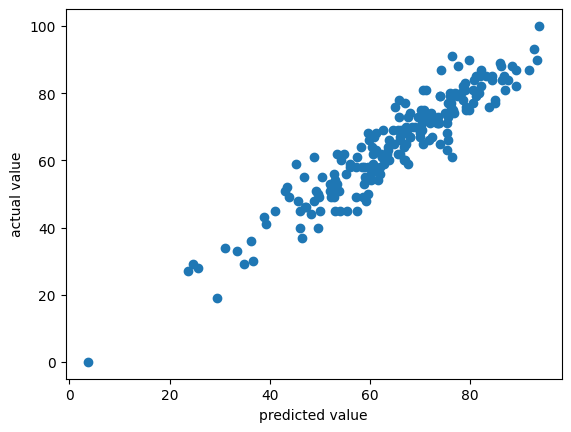

In [18]:
plt.scatter(y_pred, y_test)
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()

In [20]:
pred_df = pd.DataFrame({
    "Actual Val": y_test,
    "Predicted Val": y_pred,
    "Difference": y_test - y_pred
})

In [22]:
pred_df.reset_index(drop=True)

,Actual Val,Predicted Val,Difference
0,91,76.387970,14.612030
1,53,58.885970,-5.885970
2,80,76.990265,3.009735
3,74,76.851804,-2.851804
4,84,87.627378,-3.627378
...,...,...,...
195,52,43.409149,8.590851
196,62,62.152214,-0.152214
197,74,67.888395,6.111605
198,65,67.022287,-2.022287
